In [103]:
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
import pandas as pd 
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

In [104]:
df = pd.read_csv("Breast_cancer_data.csv", delimiter=",")

In [105]:
df.head() #gives first 5 entries of a dataframe by default

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [106]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [107]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

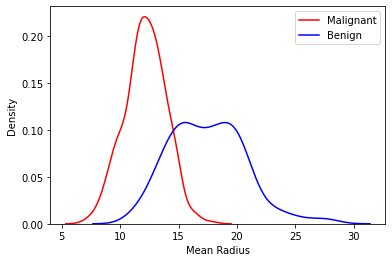

In [108]:
#Kernel-Density Plot
sns.kdeplot(df.mean_radius[ df.diagnosis==1],color='r')
sns.kdeplot(df.mean_radius[ df.diagnosis==0],color='b')
plt.legend(["Malignant", "Benign"])
plt.xlabel("Mean Radius")
plt.show()

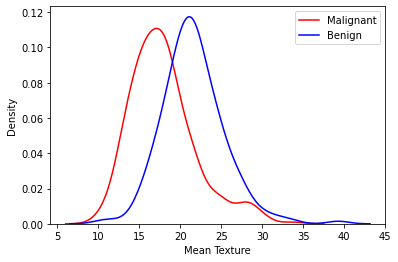

In [109]:
sns.kdeplot(df.mean_texture[ df.diagnosis==1],color='r')
sns.kdeplot(df.mean_texture[ df.diagnosis==0],color='b')
plt.legend(["Malignant", "Benign"])
plt.xlabel("Mean Texture")
plt.show()

In [110]:
count = df.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

Text(0, 0.5, 'count')

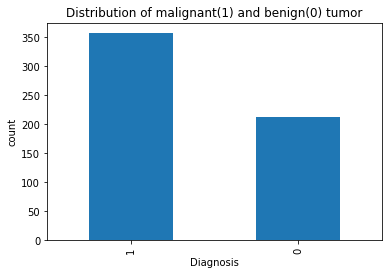

In [111]:
count.plot(kind='bar')
plt.title("Distribution of malignant(1) and benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count")

In [112]:
y_target = df['diagnosis']

In [113]:
df.columns.values

array(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'], dtype=object)

In [114]:
features = ['mean_perimeter', 'mean_texture', 'mean_area', 'mean_radius', 'mean_smoothness']

In [115]:
X_feature = df[features]

In [116]:
rdsmple = RandomOverSampler()
X_feature,y_target  = rdsmple.fit_resample(X_feature, y_target)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

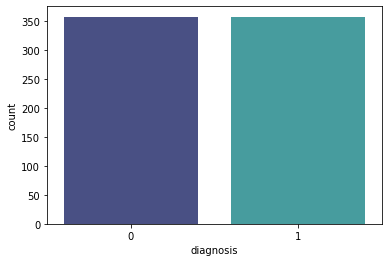

In [117]:
sns.countplot(x=y_target, palette='mako')

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test= train_test_split(X_feature, y_target, test_size=0.3, random_state = 42)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [121]:
model = LogisticRegression(solver = 'liblinear')

In [122]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [123]:
from mlxtend.plotting import plot_decision_regions

In [124]:
y_pred = model.predict(X_test)

In [125]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc*100)

Accuracy score using Logistic Regression: 90.69767441860465


In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
conf_mat = confusion_matrix(y_test, y_pred)

In [128]:
conf_mat

array([[ 90,  12],
       [  8, 105]], dtype=int64)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [130]:
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

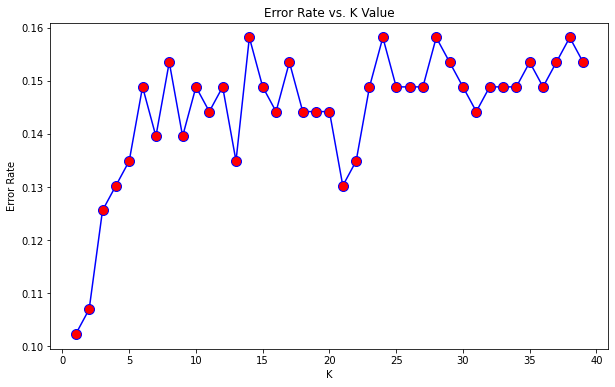

In [131]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We observe that the least value of K for which error rate is minimum is 2. Hence we use K=2 while implementing the algorithm. 

In [147]:
clf = KNeighborsClassifier(n_neighbors=2, metric='euclidean')

In [148]:
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [150]:
y_pred = clf.predict(X_test)

In [151]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using KNN:", acc*100)

Accuracy score using KNN: 89.30232558139535


In [152]:
confusion_matrix(y_test, y_pred)

array([[99,  3],
       [20, 93]], dtype=int64)

Logistic Regression is better than the KNN Algorithm